# 3. Covid-19 samples from healthy, mild and severe patients
Chen ST, Park MD, Del Valle DM, Buckup M, Tabachnikova A, Thompson RC, et al. A shift in lung macrophage composition is associated with COVID-19 severity and recovery. Sci Transl Med. 2022;14:eabn5168

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scanpro functions
from scanpro import scanpro
from scanpro.utils import convert_counts_to_df

In [2]:
# path where figures are going to be saved
FIG_PATH = 'plots'

------------------

## Read data

In [3]:
covid_counts = pd.read_csv("data/covid_counts.tsv", sep='\t')
covid = convert_counts_to_df(covid_counts, column_name="celltype")

In [4]:
covid

,Sample,Group,Disease,celltype
cell_1,HC1,Healthy,N,B cells
cell_2,HC1,Healthy,N,B cells
cell_3,HC1,Healthy,N,B cells
cell_4,HC1,Healthy,N,B cells
cell_5,HC1,Healthy,N,B cells
...,...,...,...,...
cell_65809,S2,Severe,Y,pDC
cell_65810,S2,Severe,Y,pDC
cell_65811,S2,Severe,Y,pDC
cell_65812,S4,Severe,Y,pDC


----------

## Run Scanpro

### Logit

In [5]:
out_covid_logit = scanpro(covid, clusters_col='celltype', 
                          conds_col='Group', samples_col='Sample')
out_covid_logit.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Healthy,mean_props_Moderate,mean_props_Severe,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.003343,0.003503,0.012990,0.004005,2.593405,1.030471e-01,1.472102e-01
Epithelial,0.053652,0.130246,0.051903,0.118455,1.536041,2.427651e-01,2.801274e-01
Macrophages,0.750870,0.735290,0.512996,0.604316,1.491742,2.521147e-01,2.801274e-01
Mast,0.001064,0.002337,0.002220,0.001699,1.164873,3.349114e-01,3.349114e-01
NK cells,0.016425,0.008894,0.052466,0.017979,4.841923,2.113110e-02,7.043700e-02
Neutrophil,0.024418,0.000000,0.001204,0.055594,92.441438,4.690858e-10,4.690858e-09
Plasma,0.015818,0.000224,0.002150,0.050913,10.404122,1.043908e-03,5.219539e-03
T cells,0.117241,0.094594,0.325030,0.137097,3.081910,7.122534e-02,1.275975e-01
mDC,0.014860,0.023776,0.030831,0.008876,2.984785,7.655851e-02,1.275975e-01


In [6]:
out_covid_logit.results.to_csv("results/covid_scanpro_rep_logit.tsv", sep="\t")

### arcsin

In [7]:
out_covid_arcsin = scanpro(covid, clusters_col='celltype', samples_col='Sample',
                           conds_col='Group', transform='arcsin')
out_covid_arcsin.results

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


,baseline_props,mean_props_Healthy,mean_props_Moderate,mean_props_Severe,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells,0.003343,0.003503,0.012990,0.004005,3.200032,0.075373,0.125621
Epithelial,0.053652,0.130246,0.051903,0.118455,0.310040,0.738883,0.820981
Macrophages,0.750870,0.735290,0.512996,0.604316,1.237913,0.323129,0.403912
Mast,0.001064,0.002337,0.002220,0.001699,0.042212,0.958802,0.958802
NK cells,0.016425,0.008894,0.052466,0.017979,7.534890,0.007097,0.023658
Neutrophil,0.024418,0.000000,0.001204,0.055594,7.709304,0.006560,0.023658
Plasma,0.015818,0.000224,0.002150,0.050913,1.387393,0.285560,0.403912
T cells,0.117241,0.094594,0.325030,0.137097,5.454035,0.019765,0.049100
mDC,0.014860,0.023776,0.030831,0.008876,5.055541,0.024550,0.049100


In [8]:
out_covid_arcsin.results.to_csv("results/covid_scanpro_rep_arcsin.tsv", sep="\t")

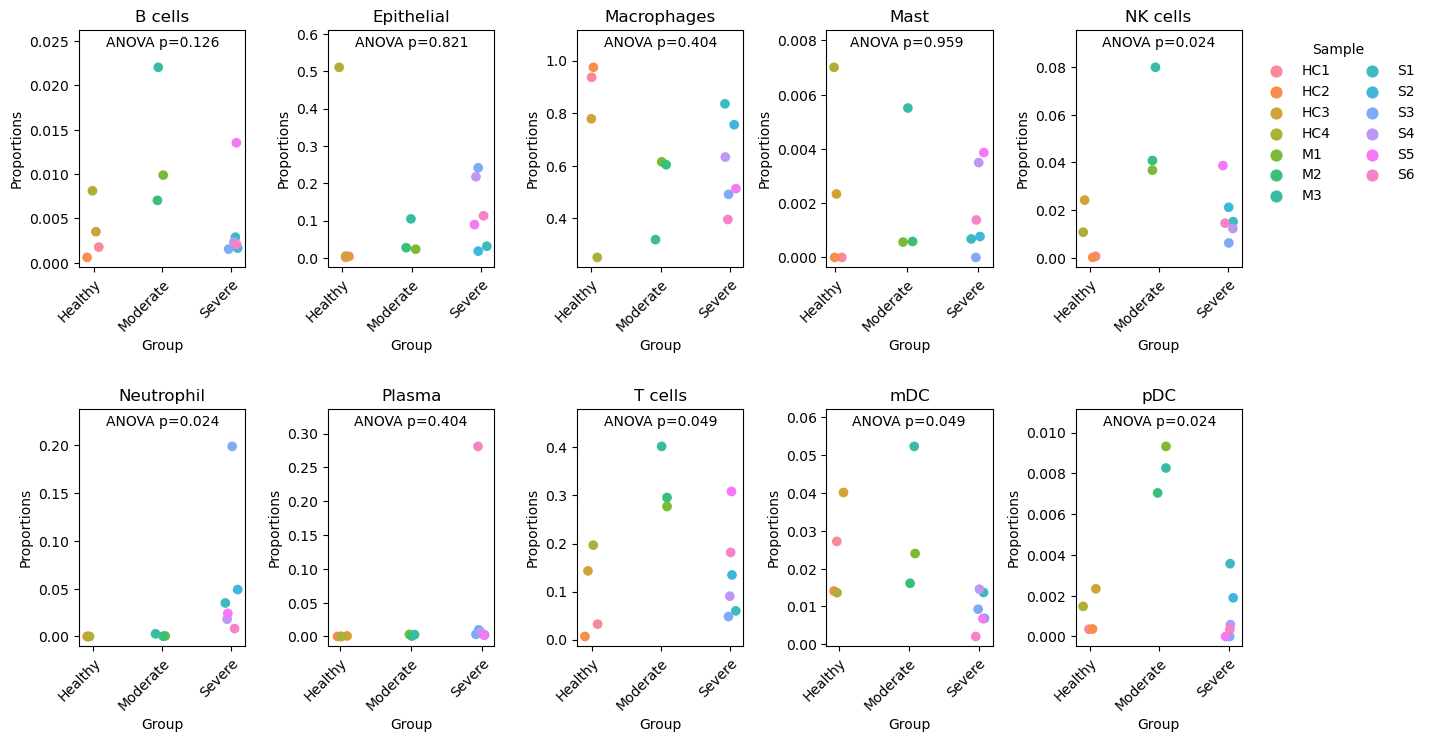

In [9]:
out_covid_arcsin.plot(n_columns=5, save=f"{FIG_PATH}/covid_stripplot_arcsin.pdf")

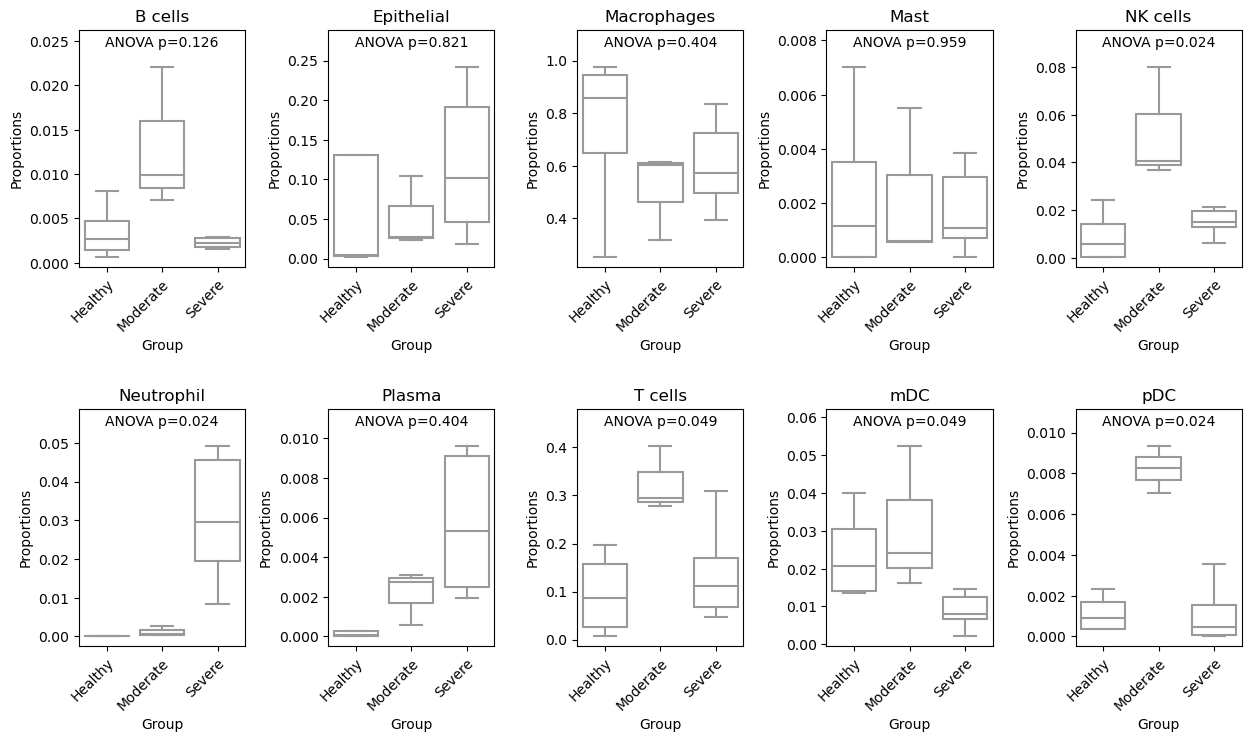

In [10]:
out_covid_arcsin.plot(kind='boxplot', n_columns=5, save=f"{FIG_PATH}/covid_boxplot_arcsin.pdf")

----------

## Without replicates

### Logit

In [11]:
out_covid_boot_logit = scanpro(covid, clusters_col='celltype',
                               conds_col='Group', n_reps=8)

out_covid_boot_logit.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[WARNING] Consider setting transform='arcsin', as this produces more accurate results for simulated data.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 13.63 seconds


,baseline_props,mean_props_Healthy,mean_props_Moderate,mean_props_Severe,p_values
clusters,,,,,
B cells,0.003343,0.001372,0.007502,0.001958,0.159756
Epithelial,0.053652,0.061720,0.026265,0.045819,0.319534
Macrophages,0.750870,0.850207,0.599225,0.727359,0.032608
Mast,0.001064,0.000523,0.000415,0.000592,0.489110
NK cells,0.016425,0.003145,0.036964,0.015301,0.013150
Neutrophil,0.024418,0.000000,0.000249,0.038975,0.000005
Plasma,0.015818,0.000034,0.001086,0.023123,0.000183
T cells,0.117241,0.051069,0.285230,0.118617,0.008558
mDC,0.014860,0.019081,0.019148,0.007420,0.298066


In [12]:
out_covid_boot_logit.results.to_csv("results/covid_scanpro_norep_logit.tsv", sep="\t")

### Arcsin

In [13]:
out_covid_boot_arcsin = scanpro(covid, clusters_col='celltype',
                                conds_col='Group', n_reps=8, transform='arcsin')

out_covid_boot_arcsin.results

[INFO] Your data doesn't have replicates! Artificial replicates will be simulated to run scanpro.
[INFO] Simulation may take some minutes...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 12.92 seconds


,baseline_props,mean_props_Healthy,mean_props_Moderate,mean_props_Severe,p_values
clusters,,,,,
B cells,0.003343,0.001400,0.007493,0.001976,0.125247
Epithelial,0.053652,0.061655,0.026211,0.045517,0.151630
Macrophages,0.750870,0.850725,0.598391,0.726995,0.001332
Mast,0.001064,0.000519,0.000413,0.000593,0.658442
NK cells,0.016425,0.003127,0.036653,0.015235,0.005646
Neutrophil,0.024418,0.000000,0.000249,0.038993,0.000018
Plasma,0.015818,0.000035,0.001070,0.023040,0.000255
T cells,0.117241,0.051025,0.286811,0.118593,0.000141
mDC,0.014860,0.019017,0.019148,0.007329,0.203773


In [14]:
out_covid_boot_arcsin.results.to_csv("results/covid_scanpro_norep_arcsin.tsv", sep="\t")

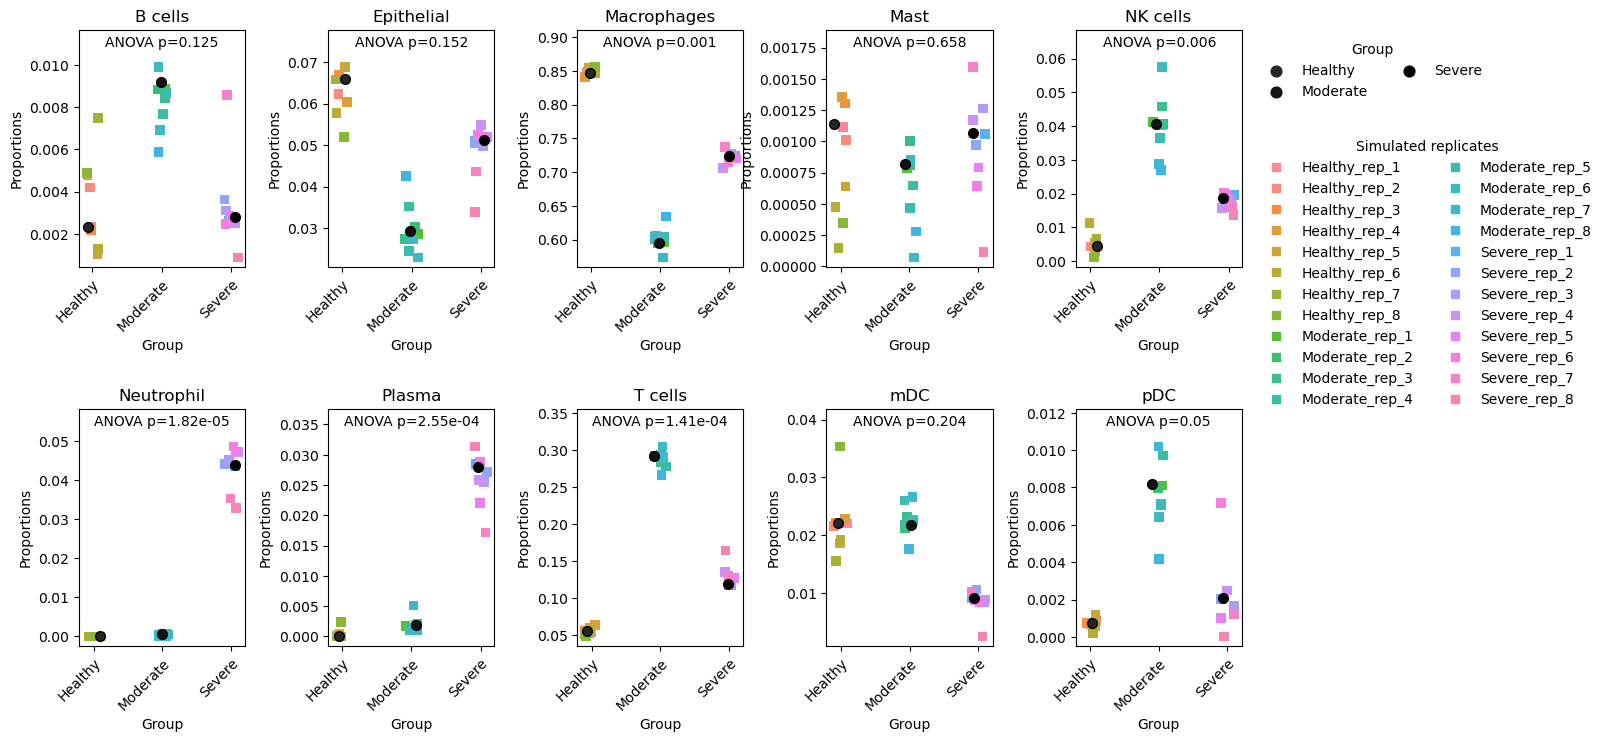

In [15]:
out_covid_boot_arcsin.plot(n_columns=5, save=f"{FIG_PATH}/covid_stripplot_norep_arcsin.pdf")

#### Plasma cells have one sample as outlier, which affects the bootstrapping result

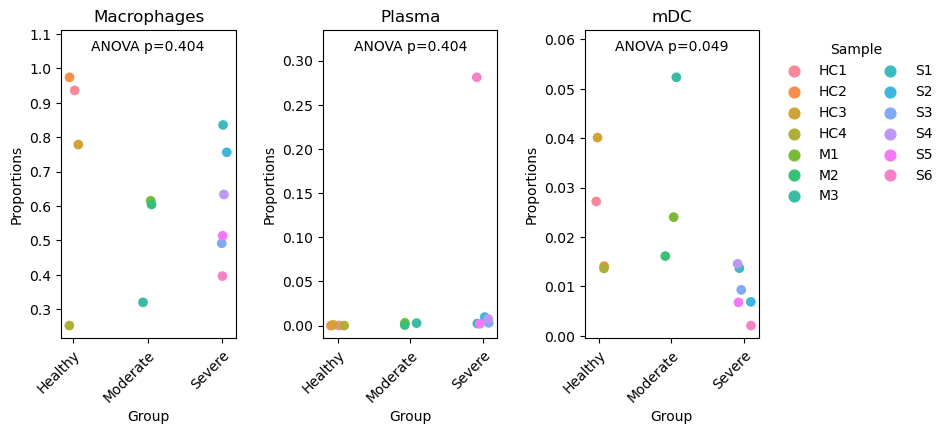

In [16]:
out_covid_arcsin.plot(n_columns=5, clusters=['Macrophages', 'Plasma', 'mDC'],
                      save=f'{FIG_PATH}/covid_stripplot_example.pdf')

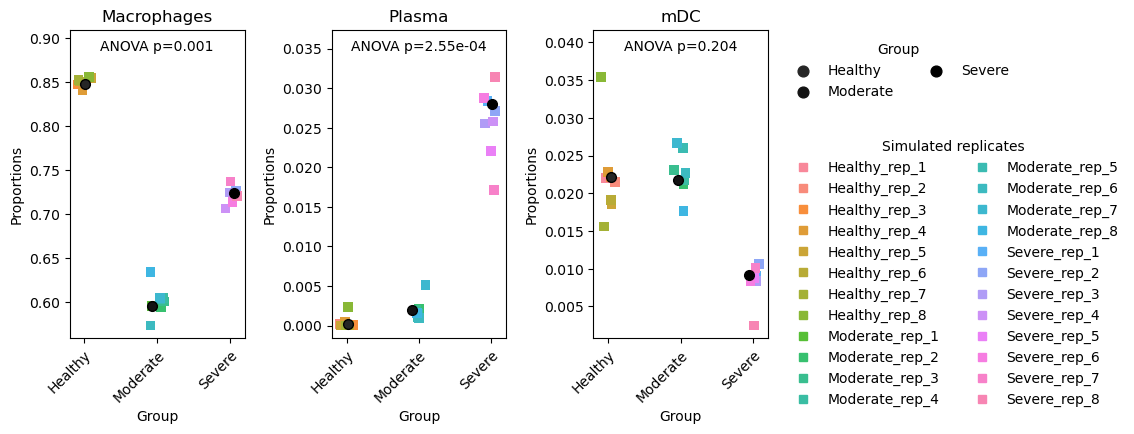

In [17]:
out_covid_boot_arcsin.plot(clusters=['Macrophages', 'Plasma', 'mDC'],
                           save=f'{FIG_PATH}/covid_stripplot_norep_example.pdf')

-----------------

# Run propeller

In [18]:
# Setup path to R
R_home = os.path.dirname(sys.executable)[:-4] + "/lib/R"
os.environ["R_HOME"] = R_home
%load_ext rpy2.ipython

In [19]:
%%R -i covid -o propeller_results_logit -o propeller_results_arcsin
library(speckle)

propeller_results_logit = propeller(clusters = covid$celltype, sample = covid$Sample, group = covid$Group, 
                                    transform = "logit")

propeller_results_arcsin = propeller(clusters = covid$celltype, sample = covid$Sample, group = covid$Group, 
                                    transform = "asin")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)
Performing logit transformation of proportions
group variable has > 2 levels, ANOVA will be performed
Performing arcsin square root transformation of proportions
group variable has > 2 levels, ANOVA will be performed


In [20]:
propeller_results_logit

,BaselineProp,PropMean.Healthy,PropMean.Moderate,PropMean.Severe,Fstatistic,P.Value,FDR
Neutrophil,0.024418,-0.000000,0.001204,0.055594,34.534717,3.546468e-07,0.000004
Plasma,0.015818,0.000224,0.002150,0.050913,8.718137,2.056673e-03,0.010283
pDC,0.002310,0.001134,0.008210,0.001066,5.785273,1.052218e-02,0.034935
NK cells,0.016425,0.008894,0.052466,0.017979,5.391241,1.397389e-02,0.034935
T cells,0.117241,0.094594,0.325030,0.137097,3.155124,6.468749e-02,0.129375
mDC,0.014860,0.023776,0.030831,0.008876,2.484229,1.090338e-01,0.167374
B cells,0.003343,0.003503,0.012990,0.004005,2.394586,1.171617e-01,0.167374
Epithelial,0.053652,0.130246,0.051903,0.118455,1.813467,1.901866e-01,0.237733
Macrophages,0.750870,0.735290,0.512996,0.604316,1.620740,2.239111e-01,0.248790
Mast,0.001064,0.002337,0.002220,0.001699,0.692073,5.127128e-01,0.512713


In [21]:
propeller_results_arcsin

,BaselineProp,PropMean.Healthy,PropMean.Moderate,PropMean.Severe,Fstatistic,P.Value,FDR
pDC,0.002310,0.001134,0.008210,0.001066,7.668004,0.007892,0.028010
Neutrophil,0.024418,-0.000000,0.001204,0.055594,7.699773,0.008007,0.028010
NK cells,0.016425,0.008894,0.052466,0.017979,7.520691,0.008403,0.028010
T cells,0.117241,0.094594,0.325030,0.137097,5.377659,0.023311,0.054665
mDC,0.014860,0.023776,0.030831,0.008876,5.037225,0.027333,0.054665
B cells,0.003343,0.003503,0.012990,0.004005,3.180201,0.080297,0.133829
Plasma,0.015818,0.000224,0.002150,0.050913,1.379356,0.291777,0.415445
Macrophages,0.750870,0.735290,0.512996,0.604316,1.218630,0.332356,0.415445
Epithelial,0.053652,0.130246,0.051903,0.118455,0.305296,0.742907,0.825452
Mast,0.001064,0.002337,0.002220,0.001699,0.046515,0.954732,0.954732


In [22]:
propeller_results_logit.to_csv("results/covid_propeller_rep_logit.tsv", sep="\t")
propeller_results_arcsin.to_csv("results/covid_propeller_rep_arcsin.tsv", sep="\t")

-----------------

# Run scCODA

In [23]:
import pertpy as pt
import anndata as ad

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

Global seed set to 0
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/mbentse/.conda/envs/scanpro_analysis/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [24]:
sccoda_adata = ad.AnnData(obs=covid)

## With replicates

In [25]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="celltype", 
                                sample_identifier="Sample", covariate_obs=["Group"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Group", reference_cell_type="Mast")

Zero counts encountered in data! Added a pseudocount of 0.5.

In [26]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
sample: 100%|██████████| 11000/11000 [03:01<00:00, 60.44it/s, 255 steps of size 1.99e-02. acc. prob=0.85]


In [27]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 13 samples, 10 cell types                                    │
│ Reference cell type                        │ Mast                                                               │
│ Formula                                    │ Group                                                              │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│              Final Parameter  Expected Sample                                                                   │
│ Cell Type                                                                                                       │
│ B cells          -1.102           123.180                                                                       │
│ Epithelial       -0.243           290.802                                                                       │
│ Macrophages       2.197          3336.387                                                                       │
│ Mast             -1.468            85.425                                                                       │
│ NK cells         -0.818           163.636                                                                       │
│ Neutrophil       -1.490            83.567                                                                       │
│ Plasma           -1.432            88.557                                                                       │
│ T cells           0.453           583.266                                                                       │
│ mDC              -0.535           217.162                                                                       │
│ pDC              -1.405            90.980                                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample  log2-fold change                                 │
│ Covariate       Cell Type                                                                                       │
│ GroupT.Moderate B cells          0.000            123.180           0.000                                       │
│                 Epithelial       0.000            290.802           0.000                                       │
│                 Macrophages      0.000           3336.387           0.000                                       │
│                 Mast             0.000             85.425           0.000                                       │
│                 NK cells         0.000            163.636           0.000                                       │
│                 Neutrophil       0.000             83.567           0.000                                       │
│                 Plasma           0.000             88.557           0.000                                       │
│                 T cells          0.000            583.266           0.000                                       │
│                 mDC              0.000            217.162           0.000                                       │
│                 pDC              0.000             90.980           0.000                                       │
│ GroupT.Severe   B cells          0.000            123.180           0.000                                       │
│                 Epithelial       0.000            290.802           0.000                                       │
│                 Macrophages      0.000           3336.387           0.000                                       │
│                 Mast             0.000             85.425           0.000                                       │
│                 NK cells         0.000            163.636           0.000                                       │
│                 Neutrophil       0.000             83.567           0.000                                       │
│                 Plasma           0.000             88.557           0.000                                       │
│                 T cells          0.000            583.266           0.000                                       │
│                 mDC              0.000            217.162           0.000                                       │
│                 pDC              0.000             90.980           0.000                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [28]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate         Cell Type                         
Group[T.Moderate] B cells                False  0.01
                  Epithelial             False  0.01
                  Macrophages            False  0.01
                  Mast                   False  0.01
                  NK cells               False  0.01
...                                        ...   ...
Group[T.Severe]   Neutrophil              True  0.40
                  Plasma                  True  0.40
                  T cells                 True  0.40
                  mDC                     True  0.40
                  pDC                    False  0.40

[120 rows x 2 columns]

In [29]:
credible_effects.to_csv("results/covid_sccoda_rep.tsv", sep="\t")

## Without replicates

In [30]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(sccoda_adata, type="cell_level", generate_sample_level=True, cell_type_identifier="celltype", 
                                sample_identifier="Group", covariate_obs=["Group"])
sccoda_data = sccoda_model.prepare(sccoda_data, modality_key="coda", formula="Group", reference_cell_type="Mast")

Zero counts encountered in data! Added a pseudocount of 0.5.

In [31]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [01:39<00:00, 110.55it/s, 511 steps of size 1.00e-02. acc. prob=0.89]


In [32]:
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 3 samples, 10 cell types                                    │
│ Reference cell type                         │ Mast                                                              │
│ Formula                                     │ Group                                                             │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│              Final Parameter  Expected Sample                                                                   │
│ Cell Type                                                                                                       │
│ B cells          -0.044           115.763                                                                       │
│ Epithelial        2.291          1195.766                                                                       │
│ Macrophages       5.008         18097.745                                                                       │
│ Mast             -0.718            59.000                                                                       │
│ NK cells          0.716           247.533                                                                       │
│ Neutrophil       -1.111            39.827                                                                       │
│ Plasma           -0.748            57.257                                                                       │
│ T cells           2.599          1627.081                                                                       │
│ mDC               1.237           416.773                                                                       │
│ pDC              -0.400            81.089                                                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                              Final Parameter  Expected Sample  log2-fold change                                 │
│ Covariate       Cell Type                                                                                       │
│ GroupT.Moderate B cells          0.000            115.763           0.000                                       │
│                 Epithelial       0.000           1195.766           0.000                                       │
│                 Macrophages      0.000          18097.745           0.000                                       │
│                 Mast             0.000             59.000           0.000                                       │
│                 NK cells         0.000            247.533           0.000                                       │
│                 Neutrophil       0.000             39.827           0.000                                       │
│                 Plasma           0.000             57.257           0.000                                       │
│                 T cells          0.000           1627.081           0.000                                       │
│                 mDC              0.000            416.773           0.000                                       │
│                 pDC              0.000             81.089           0.000                                       │
│ GroupT.Severe   B cells          0.000            115.763           0.000                                       │
│                 Epithelial       0.000           1195.766           0.000                                       │
│                 Macrophages      0.000          18097.745           0.000                                       │
│                 Mast             0.000             59.000           0.000                                       │
│                 NK cells         0.000            247.533           0.000                                       │
│                 Neutrophil       0.000             39.827           0.000                                       │
│                 Plasma           0.000             57.257           0.000                                       │
│                 T cells          0.000           1627.081           0.000                                       │
│                 mDC              0.000            416.773           0.000                                       │
│                 pDC              0.000             81.089           0.000                                       │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [33]:
# Get credible effects at different FDR levels:
credible_effects_list = []
for fdr in [0.01,0.05,0.1,0.2,0.3,0.4]:
    sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=fdr)
    
    credible_effects_table = sccoda_model.credible_effects(sccoda_data, modality_key="coda").to_frame(name="credible_effect")
    credible_effects_table["fdr"] = fdr
    credible_effects_list.append(credible_effects_table)

credible_effects = pd.concat(credible_effects_list)
credible_effects

credible_effect   fdr
Covariate         Cell Type                         
Group[T.Moderate] B cells                False  0.01
                  Epithelial             False  0.01
                  Macrophages            False  0.01
                  Mast                   False  0.01
                  NK cells               False  0.01
...                                        ...   ...
Group[T.Severe]   Neutrophil              True  0.40
                  Plasma                  True  0.40
                  T cells                 True  0.40
                  mDC                     True  0.40
                  pDC                    False  0.40

[120 rows x 2 columns]

In [34]:
credible_effects.to_csv("results/covid_sccoda_norep.tsv", sep="\t")